# 上机作业2

In [18]:
import pandas as pd
train_valid_set = pd.read_csv("car_ins_train_valid.csv")
test_set = pd.read_csv("car_ins_test.csv")

In [19]:
train_valid_set.iloc[:5, :]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
test_set.iloc[:5, :]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [21]:
train_valid_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
test_set.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


- 序号`id`: 从1开始计的整数.


## 任务1.1

- (1) 除了`id`外, 哪些变量是数值变量、哪些是定类变量、哪些是定序变量?

  - **数值变量**：年龄`Age`, 年保费`Annual_Premium`, 服务天数`Vintage`

  - **定序变量**：区域编码`Region_Code`, 汽车车龄`Vehicle_Age`

  - **定类变量**：性别`Gender`, 是否有驾照`Driving_License`, 是否有过汽车保险购买经历`Previously_Insured`, 汽车是否有过损坏经历`Vehicle_Damage`, 销售渠道`Policy_Sales_Channel`, 是否有汽车保险购入的意向`Response`

- (2) 训练-验证集共有多少条数据?

  - 训练集有数据381109条，验证集由数据127037条

  - 共有数据508146条

- (3) 年保险费`Annual_Premium`和服务天数`Vintage`的取值数量级各自为多少？

  - 年保险费`Annual_Premium`的取值数量级为$10^4$

  - 服务天数`Vintage`的取值数量级为$10^2$



In [23]:
import matplotlib
from matplotlib import pyplot as plt

def visualize_data(
    data: pd.DataFrame, ax1: matplotlib.axes.Axes, ax2: matplotlib.axes.Axes, ax3: matplotlib.axes.Axes,
    numerical_col: str="Age",
    categorical_col: str="Vehicle_Age",
    label_col: str="Response"
):
    ### BEGIN YOUR SOLUTION ###
    
    # 为ax1绘制箱线图
    data[numerical_col].plot(kind="box", ax=ax1)
    ax1.set_title(f"{numerical_col} boxplot")
    ax1.set_xlabel(numerical_col)
    ax1.set_ylabel("Value")
    
    # 为ax2绘制饼图
    data[categorical_col].value_counts().plot(kind="pie", ax=ax2, autopct='%1.1f%%', ylabel="")
    ax2.set_title(f"{categorical_col} pie plot")
    
    # 为ax3绘制柱状图
    data[label_col].value_counts().plot(kind="bar", ax=ax3)
    ax3.set_title(f"{label_col} bar plot")
    ax3.set_xlabel(label_col)
    ax3.set_ylabel("Count")
    
    ### END YOUR SOLUTION ###

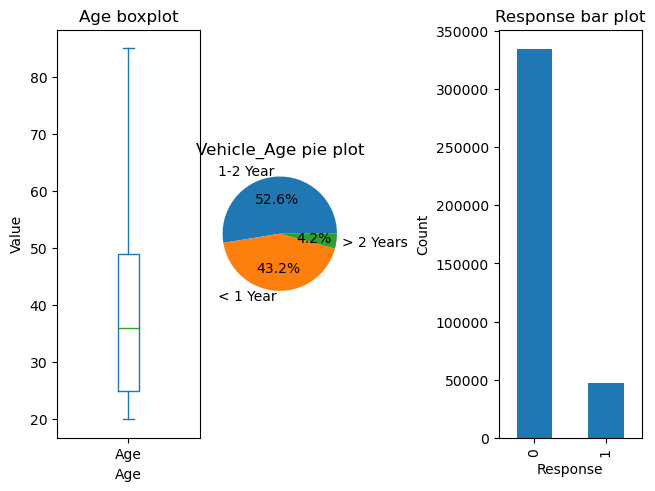

In [24]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, layout="constrained")
visualize_data(train_valid_set, ax1, ax2, ax3)
plt.show()

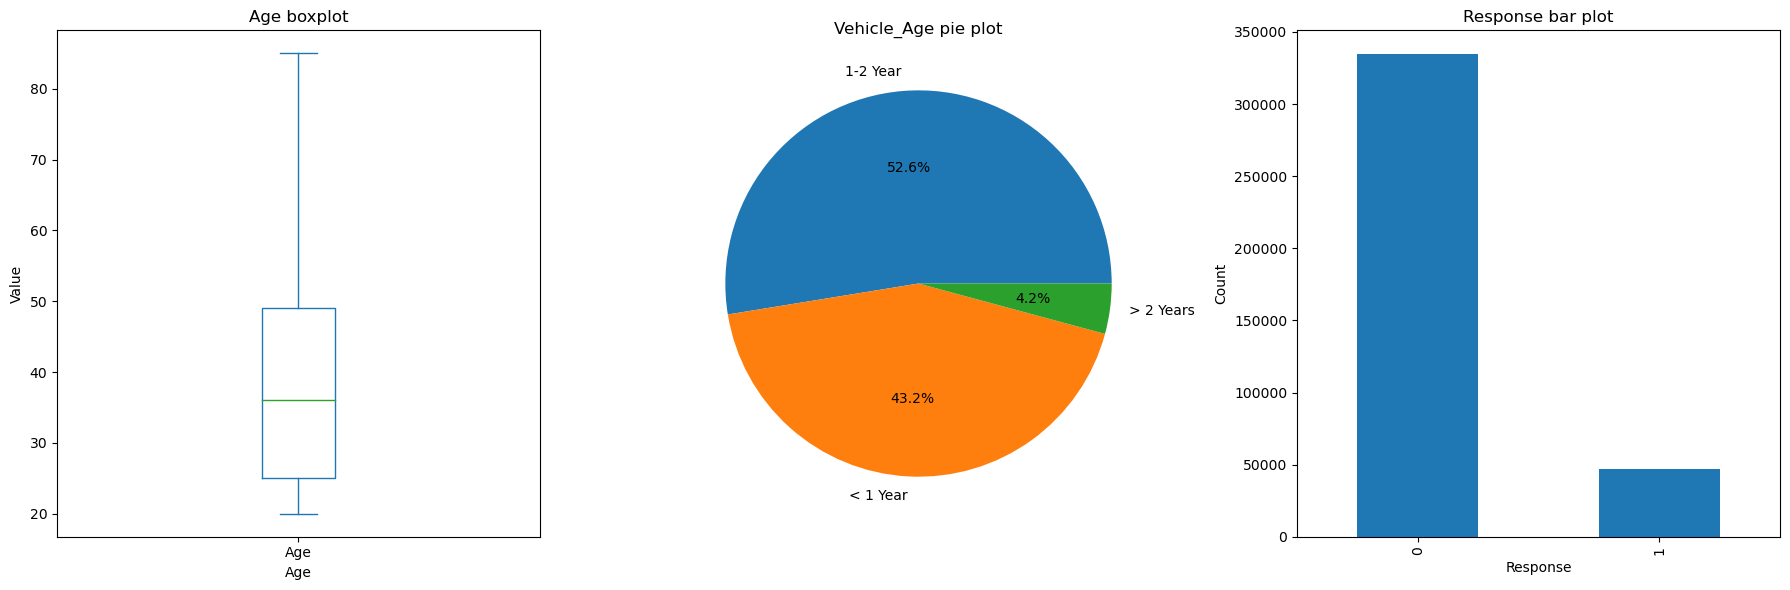

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
visualize_data(train_valid_set, ax1, ax2, ax3)
plt.tight_layout()
plt.show()

## 任务2 数据预处理

In [26]:
from typing import List, Tuple
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess_features(
    X_train: pd.DataFrame, X_valid: pd.DataFrame,
    numerical_cols: List[str]=["Age", "Annual_Premium", "Vintage"],
    ordinal_cols: List[Tuple[str, List[str]]]=[("Vehicle_Age", ["< 1 Year", "1-2 Year", "> 2 Years"])],
    nominal_cols: List[str]=["Gender", "Vehicle_Damage", "Driving_License", "Previously_Insured"],
    dropped_cols: List[str]=["id", "Region_Code", "Policy_Sales_Channel"]
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    
    X_train = X_train.drop(columns=dropped_cols)
    X_valid = X_valid.drop(columns=dropped_cols)

    # 处理定序变量
    for col, labels in ordinal_cols:
        X_train[col] = X_train[col].apply(lambda x: labels.index(x))
        X_valid[col] = X_valid[col].apply(lambda x: labels.index(x))

    # 处理定类变量 
    encoder = OneHotEncoder(sparse=False)
    encoder_train = encoder.fit_transform(X_train[nominal_cols])
    encoder_valid = encoder.transform(X_valid[nominal_cols])

    encoder_train_df = pd.DataFrame(encoder_train, columns=encoder.get_feature_names_out(nominal_cols), index=X_train.index)
    encoder_valid_df = pd.DataFrame(encoder_valid, columns=encoder.get_feature_names_out(nominal_cols), index=X_valid.index)
    
    X_train = pd.concat([X_train.drop(columns=nominal_cols), encoder_train_df], axis=1)
    X_valid = pd.concat([X_valid.drop(columns=nominal_cols), encoder_valid_df], axis=1)

    # 处理数值变量
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

    return X_train, X_valid

In [27]:
### CAUTION: DO NOT MODIFY THIS CELL. ###

X_train_ = train_valid_set.iloc[:1000, :-1]
X_valid_ = train_valid_set.iloc[1000:2000, :-1]
test_columns = ['Age', 'Vehicle_Age', 'Annual_Premium', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes',
       'Driving_License_0', 'Driving_License_1', 'Previously_Insured_0',
       'Previously_Insured_1']
numerical_cols = ["Age", "Annual_Premium", "Vintage"]
ordinal_cols = [("Vehicle_Age", ["< 1 Year", "1-2 Year", "> 2 Years"])]

def test_preprocess_features_columns(X_train, X_valid, test_columns):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid)
    assert set(X_train_processed.columns) == set(test_columns), "wrong training set column names."
    assert set(X_valid_processed.columns) == set(test_columns), "wrong validation set column names."

def test_preprocess_features_numerical(X_train, X_valid, numerical_cols):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid, numerical_cols=numerical_cols)
    n_features = len(numerical_cols)
    mean_train, std_train = X_train[numerical_cols].mean(axis=0), X_train[numerical_cols].std(axis=0, ddof=0)
    mean_valid, std_valid = X_valid[numerical_cols].mean(axis=0), X_valid[numerical_cols].std(axis=0, ddof=0)
    np.testing.assert_allclose(
        X_train_processed[numerical_cols].mean(axis=0), np.zeros(n_features), atol=1.0e-5,
        err_msg="invalid X_train normalization: non-zero mean."
    )
    np.testing.assert_allclose(
        X_train_processed[numerical_cols].std(axis=0, ddof=0), np.ones(n_features), rtol=1.0e-3,
        err_msg="invalid X_train normalization: non-unit std."
    )
    np.testing.assert_allclose(
        X_valid_processed[numerical_cols].mean(axis=0), (mean_valid - mean_train) / std_train, rtol=1.0e-3,
        err_msg="invalid X_valid normalization: not using training parameters."
    )
    np.testing.assert_allclose(
        X_valid_processed[numerical_cols].std(axis=0, ddof=0), std_valid / std_train, rtol=1.0e-3,
        err_msg="invalid X_valid normalization: not using training parameters."
    )

def test_preprocess_features_ordinal(X_train, X_valid, ordinal_cols):
    X_train_processed, X_valid_processed = preprocess_features(X_train, X_valid, ordinal_cols=ordinal_cols)
    for col, labels in ordinal_cols:
        for i, label in enumerate(labels):
            assert set(X_train[X_train[col] == label].index) == set(X_train_processed[X_train_processed[col] == i].index),\
                f"invalid ordinal mapping for label {label} in {col} on training set."
            assert set(X_valid[X_valid[col] == label].index) == set(X_valid_processed[X_valid_processed[col] == i].index),\
                f"invalid ordinal mapping for label {label} in {col} on validation set."

try:
    print("columns:", end=" ")
    test_preprocess_features_columns(X_train_, X_valid_, test_columns)
    print("PASSED")
except Exception as err:
    print(err)

try:
    print("numerical scaling:", end=" ")
    test_preprocess_features_numerical(X_train_, X_valid_, numerical_cols)
    print("PASSED")
except Exception as err:
    print(err)

try:
    print("ordinal mapping:", end=" ")
    test_preprocess_features_ordinal(X_train_, X_valid_, ordinal_cols)
    print("PASSED")
except Exception as err:
    print(err)

columns: PASSED
numerical scaling: PASSED
ordinal mapping: PASSED


c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\11234\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
